## DATA ANALYSIS PYTHON PORJECT - BLINKIT ANALYSIS

##### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


##### IMPORT RAW DATA

In [2]:
df = pd.read_csv("blinkit_data.csv")
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [3]:
#To check if all the data got transferred
df.shape

(8523, 12)

##### CHECK DATA TYPES

In [4]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

##### DATA CLEANING

In [5]:
print(df["Item Fat Content"].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [6]:
df["Item Fat Content"] = df["Item Fat Content"].replace({"LF":"Low Fat",
                                                         "low fat":"Low Fat",
                                                         "reg":"Regular"})
print(df["Item Fat Content"].unique())

['Regular' 'Low Fat']


In [7]:
print(df["Outlet Size"].unique())

['Medium' 'Small' 'High']


In [8]:
print(df["Outlet Location Type"].unique())

['Tier 1' 'Tier 3' 'Tier 2']


In [9]:
print(df["Outlet Type"].unique())

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


##### BUSINEES REQUIREMENTS

##### KPIs REREQUIREMENTS

In [10]:
#Total Sales

total_sales = df["Sales"].sum()

#Average Sales

avg_sales = df["Sales"].mean()

#Number of items sold

no_of_items_sold = df["Sales"].count()

#Average Rating

avg_rating = df["Rating"].mean()

#Display

print(f"Total Sales: ${total_sales:,.1f}")
print(f"Average Sales: ${avg_sales:,.1f}")
print(f"Number of items sold: {no_of_items_sold:,.1f}")
print(f"Average Rating: {avg_rating :,.1f}")

Total Sales: $1,201,681.5
Average Sales: $141.0
Number of items sold: 8,523.0
Average Rating: 4.0


##### CHARTS REREQUIREMENTS

##### 1. Total Sales by Fat Content

Item Fat Content
Low Fat    776319.6784
Regular    425361.8024
Name: Sales, dtype: float64


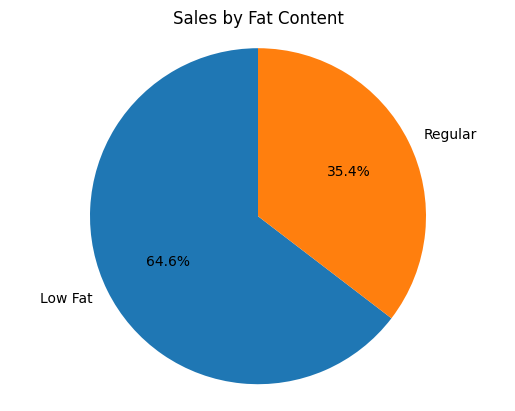

In [11]:
sales_by_fat = df.groupby("Item Fat Content")["Sales"].sum()
print(sales_by_fat)

plt.pie(sales_by_fat.values, labels=sales_by_fat.index,
        autopct=lambda pct: f"{pct:.1f}%", 
        startangle=90)
plt.title("Sales by Fat Content")
plt.axis("equal")
plt.show()

##### 2. Total Sales by Item Type

Item Type
Fruits and Vegetables    178124.0810
Snack Foods              175433.9204
Household                135976.5254
Frozen Foods             118558.8814
Dairy                    101276.4596
Canned                    90706.7270
Baking Goods              81894.7364
Health and Hygiene        68025.8388
Meat                      59449.8638
Soft Drinks               58514.1650
Breads                    35379.1198
Hard Drinks               29334.6766
Others                    22451.8916
Starchy Foods             21880.0274
Breakfast                 15596.6966
Seafood                    9077.8700
Name: Sales, dtype: float64


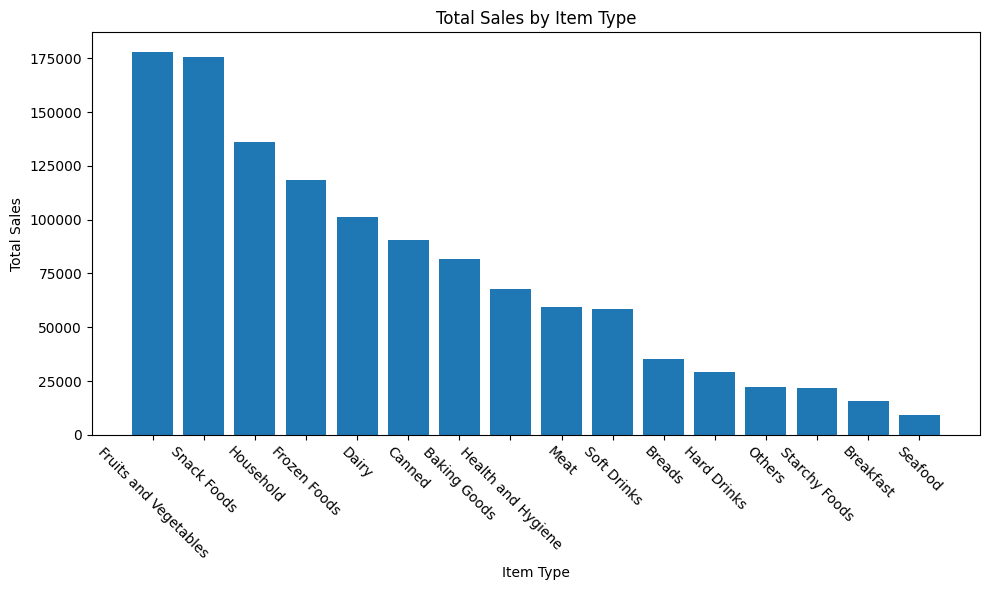

In [12]:
total_sales_by_item_type = df.groupby("Item Type")["Sales"].sum().sort_values(ascending = False)
print(total_sales_by_item_type)

plt.figure(figsize = (10,6))
plt.bar(total_sales_by_item_type.index, total_sales_by_item_type.values)

plt.xticks(rotation= -45)
plt.xlabel("Item Type")
plt.ylabel("Total Sales")
plt.title("Total Sales by Item Type")

plt.tight_layout()
plt.show()


##### 3. Fat Content by Outlet for Total Sales

Item Fat Content          Low Fat      Regular
Outlet Location Type                          
Tier 1                215047.9126  121349.8994
Tier 2                254464.7734  138685.8682
Tier 3                306806.9924  165326.0348


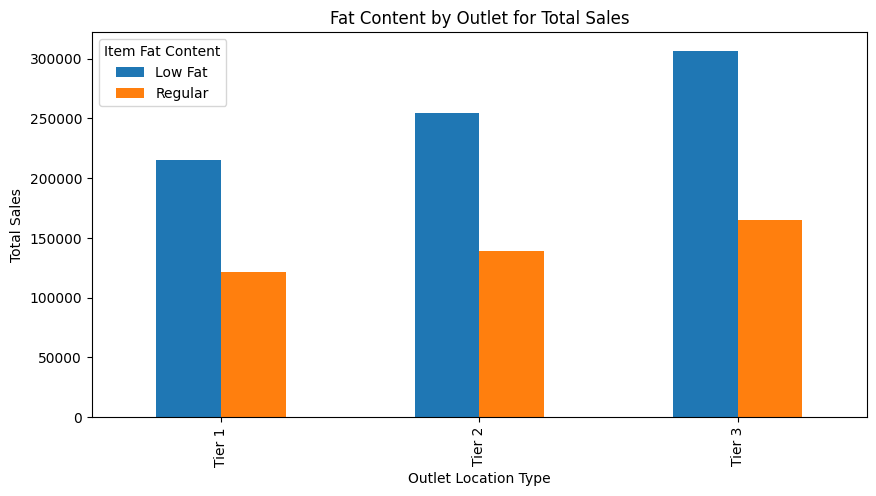

In [13]:
grouped = df.groupby(["Outlet Location Type", "Item Fat Content"])["Sales"].sum().unstack()

print(grouped)

grouped.plot(kind = "bar", figsize= (10,5), title = 'Fat Content by Outlet for Total Sales')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.legend(title = 'Item Fat Content')
plt.show()

##### 4. Total Sales by Outlet Establishment

Outlet Establishment Year
1998    204522.2570
2000    131809.0156
2010    132113.3698
2011     78131.5646
2012    130476.8598
2015    130942.7782
2017    133103.9070
2020    129103.9564
2022    131477.7724
Name: Sales, dtype: float64


Text(0.5, 1.0, 'Outlet Establishment')

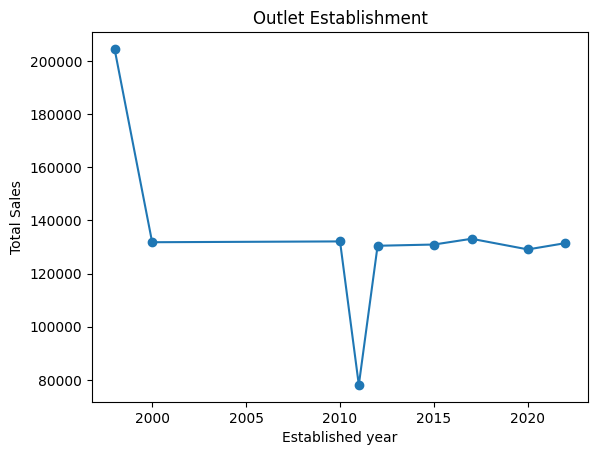

In [14]:
sales_to_outlet = df.groupby(['Outlet Establishment Year'])["Sales"].sum()
print(sales_to_outlet)

plt.Figure(figsize=(8,5))
plt.plot(sales_to_outlet.index, sales_to_outlet.values, marker ='o', linestyle = '-')

plt.xlabel('Established year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')


##### 5. Sales by Outlet Size

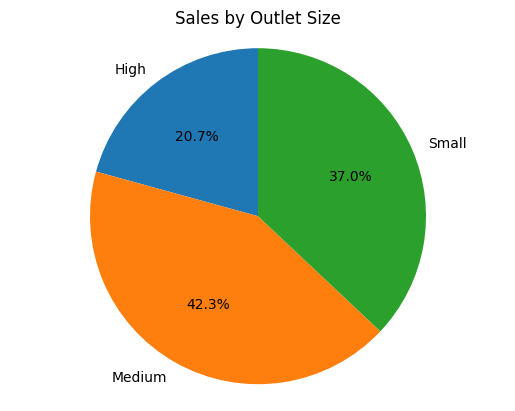

In [15]:
outlet_size_sales = df.groupby('Outlet Size')['Sales'].sum()

plt.pie(outlet_size_sales.values, labels=outlet_size_sales.index,
        autopct=lambda pct: f"{pct:.1f}%", 
        startangle=90)
plt.title("Sales by Outlet Size")
plt.axis("equal")
plt.show()

##### Sales by Outlet Location

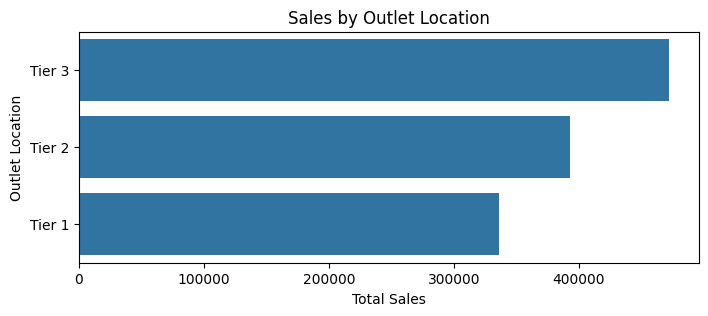

In [16]:
sales_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_location = sales_location.sort_values('Sales',ascending=False)

plt.figure(figsize=(8,3))
ax = sns.barplot( x = 'Sales', y = 'Outlet Location Type', data= sales_location)
plt.title('Sales by Outlet Location')
plt.ylabel('Outlet Location')
plt.xlabel('Total Sales')
plt.show()